In [1]:
# this is using the hsnt kernel conda environment

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

from __code.step1_prepare_white_beam_mode_images import Step1PrepareWhiteBeamModeImages


from __code import system

system.System.select_working_dir(facility='SNS', instrument='VENUS', ipts='IPTS-33531')
from __code.__all import custom_style
custom_style.style()

# <font color='red'>Input sample folder</font>

This folder will contains all the images (1 image per angle)

<font color='blue'><b>Instructions</b>: select folder containing projections</font>

In [2]:
o_white_beam = Step1PrepareWhiteBeamModeImages(system=system)
o_white_beam.select_top_sample_folder()

logging file: /SNS/VENUS/shared/log/step1_prepare_white_beam_mode_images.log
working_dir = '/SNS/VENUS/IPTS-33531'
Top sample folder selected: /SNS/VENUS/IPTS-33531/shared/processed_data/truck_CT_data/


# <font color='red'>Input Open Beam (OB) folder</font>

Select the images to use as OB

<font color='blue'><b>Instructions</b>: select individual images</font>

In [3]:
o_white_beam.select_ob_images()

top ob folder is: /SNS/VENUS/IPTS-33531/shared/processed_data/ob


# <font color='red'>Input Dark Current (DC) folder</font>

Select the images to use as DC

<font color='blue'><b>Instructions</b>: select individual images</font>

In [4]:
o_white_beam.select_dc_images()

top dc folder is: /SNS/VENUS/IPTS-33531/shared/processed_data/dc/45s


# <font color='red'>Define file naming schema</font>

This is needed to extract the angle value from the images file name

In [5]:
o_white_beam.define_naming_schema()

HTML(value='<b>Check the 2 fields to use to determine the angle value (degree.minutes)!</b>')

HTML(value="<font color='red'><b>ERROR</b>: Select 2 and only 2 checkboxes!</font>")

HTML(value='<hr>')

# <font color='red'>Percentage of data to use </font>

In [6]:
o_white_beam.select_percentage_of_data_to_use()

IntSlider(value=50, layout=Layout(width='100%'), min=1)

Label(value='90 images will be used for the reconstruction')

# <font color='red'>Load data</font>

This cell will load the data.

- <font color=blue><b>White beam</b></font>:
This step will add all the counts within a given run, making it feel like the data were acquired in white beam mode, loosing the time-of-flight (TOF) information.

This step will also sort the runs by increasing angle value.

In [7]:
o_white_beam.load_data()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw, ob and dc

In [ ]:
o_white_beam.how_to_visualize()

In [ ]:
o_white_beam.visualize_raw_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the raw data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.pre_processing_crop_settings()

execute the cropping

In [9]:
o_white_beam.pre_processing_crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove outliers</font><font color='purple' size='3'> - OPTIONAL</font>

Three algorithms are provided:

* using `in-house` method with histogram (remove dead pixels, abnormal very high counts)
* using Tomopy `remove_outlier` method (remove high intensity bright spots)
* using Scipy `gamma_filter` method

<font color='blue'><b>Instructions</b>: select the algorithms you want to use.

In [8]:
o_white_beam.clean_images_settings()

The next cell will be ignored if you didn't select <b>histogram</b>. 

<font color='blue'><b>Instructions</b>: if using the <b>histogram</b> algorithm, by default, all the pixels found in the first and last bin are considered as **bad** pixels. You have the option to change those settings. </font>

In [9]:
o_white_beam.clean_images_setup()

HTML(value='<h2> Tomopy settings </h2>')

FloatSlider(value=20.0, description='Diff value', min=1.0)

In [10]:
o_white_beam.clean_images()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>

Select the mode you want to use:
 - all images <b>(this may take a long time to process !)</b>
 - visual verification of raw, ob and dc

### How do you want to visualize the cleaned data?

In [ ]:
o_white_beam.how_to_visualize_after_cleaning()

In [ ]:
o_white_beam.visualize_cleaned_data()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rebin pixels</font><font color='purple' size='3'> - OPTIONAL</font>

Under Construction

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Normalization</font>


<font color='blue'><b>Instructions</b>: in order to improve the normalization, you can turn ON/OFF any of the following 

- <font color=red><b>use proton charge</b></font>: that option will use the proton charge value requested for each runs and open beams and will bring them to the same value by applying a coefficient corector to the data.
- <font color=red><b>use background region of interest (ROI)</b></font>: select a region that does not contain any part of the sample in order to match the counts with the same ROI of the open beam.</font>

In [11]:
o_white_beam.normalization_settings()

This next cell will allow you to select the background region within the projections images, or will just be ignored if you not chose to use it.

<font color='blue'><b>Instructions</b>: define ROI

Make sure you select a region <font color='red'> OUTSIDE</font> of your sample

<img src="__code/__all/demo_of_roi_selection.gif" width="50%" />

NB: The next cell will be ignored if you didn't select <b>Use ROI</b>

In [12]:
o_white_beam.normalization_select_roi()

This cell will perform the normalization using any of the settings you define just above.

In [13]:
o_white_beam.normalization()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Visualize normalized data</font><font color='purple' size='3'> - OPTIONAL</font>

In [14]:
o_white_beam.visualization_normalization_settings()

ToggleButtons(description='How to plot?', options=('1 image at a time', 'All images'), value='1 image at a tim…

In [15]:
o_white_beam.visualize_normalization()

interactive(children=(IntSlider(value=0, description='image_index', max=89), IntSlider(value=0, description='v…

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Export the normalized data</font><font color='purple' size='3'> - OPTIONAL</font>


Select the folder where to export the normalized images


In [ ]:
o_white_beam.select_export_normalized_folder()

Run this cell to execute the export of the normalized images


In [ ]:
o_white_beam.export_normalized_images()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Crop the data</font><font color='purple' size='3'> - OPTIONAL</font>

In [ ]:
o_white_beam.crop_settings()

execute the cropping

In [19]:
o_white_beam.crop()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Rotate the data</font><font color='purple' size='3'> - OPTIONAL</font>

<font color='blue'>The reconstruction algorithm will ONLY work if the rotation axis is VERTICAL</font>!

select the angle to use

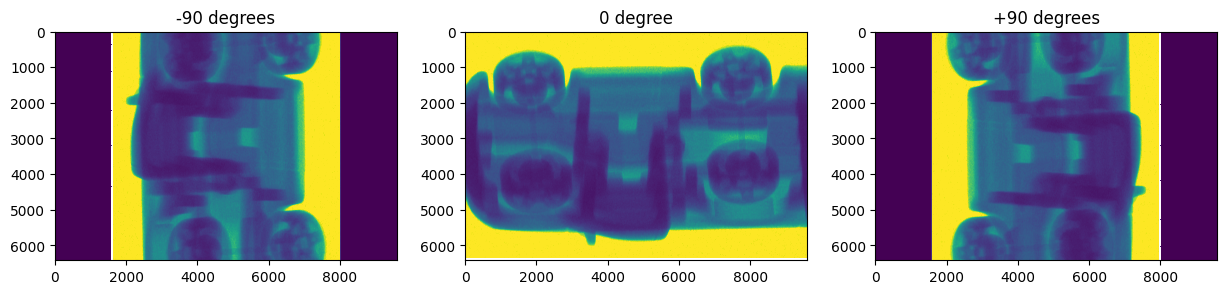

In [16]:
o_white_beam.rotate_data_settings()

Run to perform the transformation by the angle specified

In [18]:
o_white_beam.apply_rotation()

100%|██████████| 90/90 [00:57<00:00,  1.55it/s]


Vizualize the images after rotation - OPTIONAL

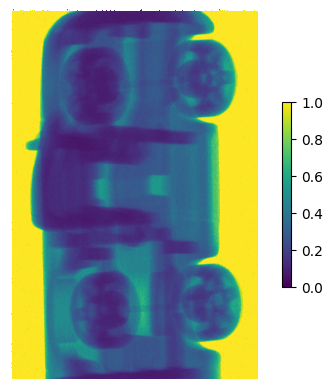

In [20]:
o_white_beam.visualize_after_rotation()

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Minus log conversion</font>

In [21]:
o_white_beam.log_conversion_and_cleaning()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>


In [22]:
o_white_beam.visualize_images_after_log()

(90, 9600, 6422)
left.dtype =dtype('float32')


interactive(children=(IntSlider(value=0, description='index', max=89), Output()), _dom_classes=('widget-intera…

<hr style="border-bottom: dotted 1px;" />
<hr style="height: 2px" />

# <font color='red'>Create sinograms</font>

In [ ]:
o_white_beam.create_sinograms()

<hr><hr style="border-bottom: dotted 1px;" />
<font color='purple' size='5'>Visualization</font><font color='purple' size='3'> - OPTIONAL</font>


In [ ]:
o_white_beam.visualize_sinograms()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Remove stripes</font><font color='purple' size='3'> - OPTIONAL</font>

Run if you want to remove any stripes causing ring artifacs in the reconstruction

In [ ]:
o_white_beam.select_remove_strips_algorithms()

In [ ]:
o_white_beam.define_settings()

In [ ]:
o_white_beam.remove_strips_and_display()

<hr style="height: 2px" /><hr style="border-bottom: dotted 1px" />
<font color='purple' size='5'>Calculate center of rotation and tilt</font><font color='purple' size='3'> - OPTIONAL</font>

The algorithm will determine the 0 and 180 degrees runs and use those to calculate the <b>center of rotation</b> and the <b>tilt</b>
<br><br>

<font color='blue'><b>Instructions</b>: first, you need to select an vertical range contaning the sample

<font color='blue'>TIPS</font> - Make sure the sample is within the range defined

<font size=1 color='red'><u>Developer Notes</u>: this step will create the 3d array <i>corrected_images</i>

In [ ]:
o_white_beam.select_sample_roi()

Select the mode you want to use to calculate the **center of rotation** and the **tilt**

* automatic mode will use the [neutompy](https://neutompy-toolbox.readthedocs.io/en/latest/index.html) library
* manual mode will let you figure out the tilt and the center of rotation

In [ ]:
o_white_beam.center_of_rotation_and_tilt_settings()

<font color='blue'><b><u>Instructions</u></b>: 

<b>Manual</b> mode:  

* select the images you want to display at the same time using **CMD + click**
* **position the blue** vertical dashed line at the center of rotation
* **rotate** the sample in order to determine the tilt correction to apply

<b>Automatic</b> mode:  

* **tilt** and **center of rotation** will be automaticaly calculated and apply

In [ ]:
o_white_beam.perform_center_of_rotation_and_tilt()

<hr style="border-bottom: dotted 1px;" /><hr style="height: 2px" />

# <font color='red'>Select reconstruction method(s)</font>

In [ ]:
o_white_beam.select_reconstruction_method()

# <font color='red'>Set up reconstruction parameters</font>

<font color='blue'><b>Instructions</b>: 

- define the reconstruction settings (keeping the <b>default values</b> is a good choice for novice users)</font>



In [21]:
o_white_beam.reconstruction_settings()

# <font color='red'>Create config file and export pre-processed images</font>

* <b>config file</b> will be used in the next step (step1_####.json)
* <b>log file</b> to check the full process up to here
* <b>stack of projectons ready to be reconstructed</b>

In [ ]:
o_white_beam.select_export_extra_files()

In [ ]:
o_white_beam.export_extra_files(prefix='step1')

<hr style="border-bottom: dotted 1px;" /><hr>